In [24]:
import numpy as np
import matplotlib.pyplot as plt

The class <code>plot_diagram</code> helps us to visualize the data space and the parameter space during training and has nothing to do with PyTorch.


In [87]:
# The class for plotting

class plot_diagram():

    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        print(type(X.numpy()))
        self.X = X.numpy()

        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values]
        w.data = start

    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        # Convert lists to PyTorch tensors
        parameter_values_tensor = torch.tensor(self.parameter_values)
        loss_function_tensor = torch.tensor(self.Loss_function)

        # Plot using the tensors
        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())

        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()

    # Destructor
    def __del__(self):
        plt.close('all')

Generating some random daaa for this example

In [88]:
import torch

# Create the f(X) with a slope of -3
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

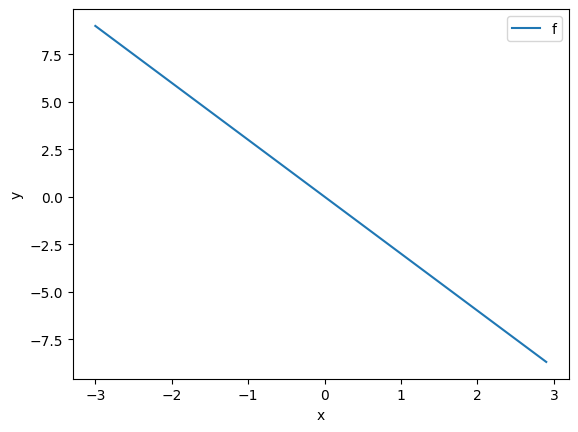

In [89]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

adding some noise to the data in order to simulate the real data.<code>torch.randn(X.size())</code> to generate Gaussian noise that is the same size as <code>X</code> and has a standard deviation of 0.1.

In [90]:
# Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

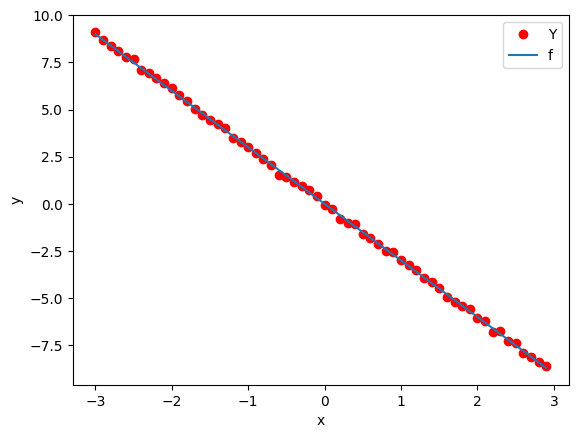

In [91]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'ro', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Create the Model and Cost Function (Total Loss)


Creating the model and the cost function (total loss) using the train the model and evaluate the result. <br/>
define the <code>forward</code> function $y=w*x$.

In [92]:
# Create forward function for prediction
def forward(x):
    return w * x

# Create the MSE function for evaluate the result.
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Defining the learning rate <code>lr</code> and an empty list <code>LOSS</code> to record the loss for each iteration:   


In [93]:
lr = 0.1
LOSS = []

Creating a model parameter by setting the argument requires_grad to True because the system must learn it.

In [94]:
w = torch.tensor(-10.0, requires_grad = True)

Creating a <code>plot_diagram</code> object to visualize the data space and the parameter space for each iteration during training:

In [95]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

<class 'numpy.ndarray'>


# Training the model <br/>

Function for training the model.

In [96]:
# Define a function for training the model

def train_model(iter):
  for epoch in range (iter):

    # prediction step using Yhat
    Yhat = forward(X)
    # calculate the iteration
    loss = criterion(Yhat, Y)
    # plotting the diagram for a better visual
    gradient_plot(Yhat, w, loss.item(), epoch)
    # store the loss in the list
    LOSS.append(loss.item())
    # backpass phase to compute gradient with respect to the learned parameters
    loss.backward()
    # update parameters
    w.data = w.data - lr * w.grad.data
    # zero the gradients before the next backward pass
    w.grad.data.zero_()

<ipython-input-87-aed0fd8494ff>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


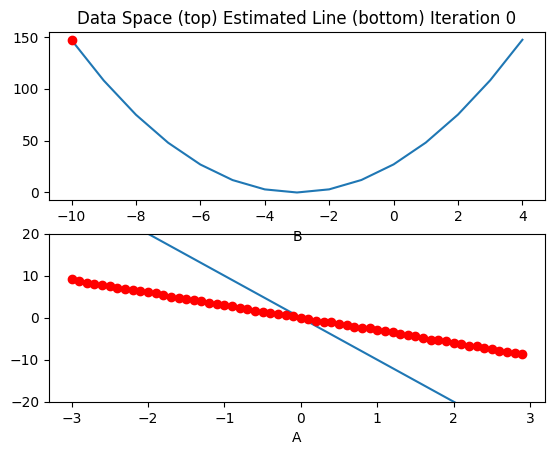

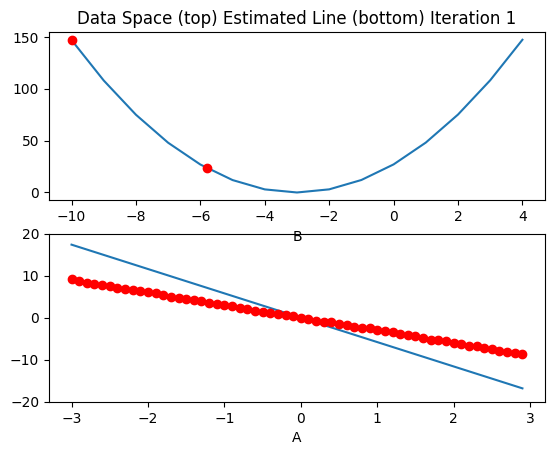

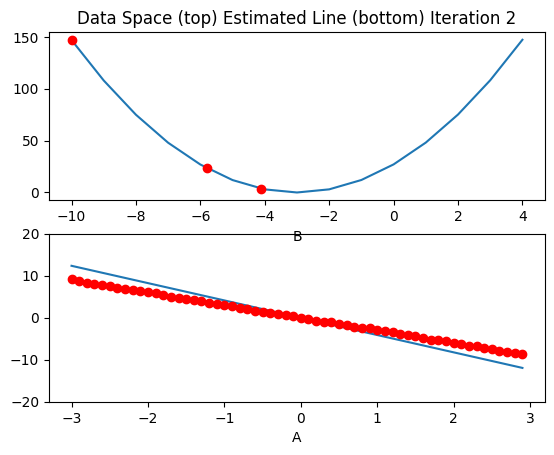

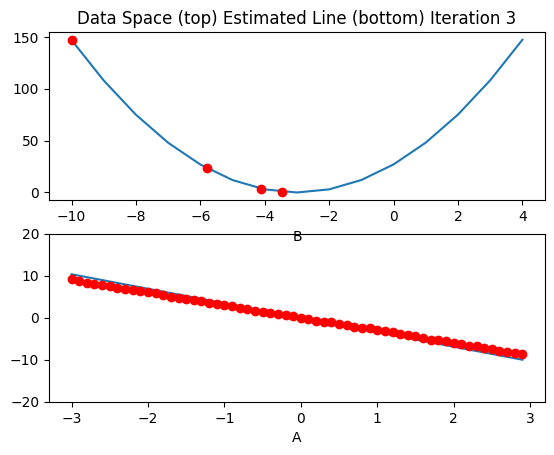

<Figure size 640x480 with 0 Axes>

In [97]:
# 4 iterations for training the model.

train_model(4)

Text(38.347222222222214, 0.5, 'Cost')

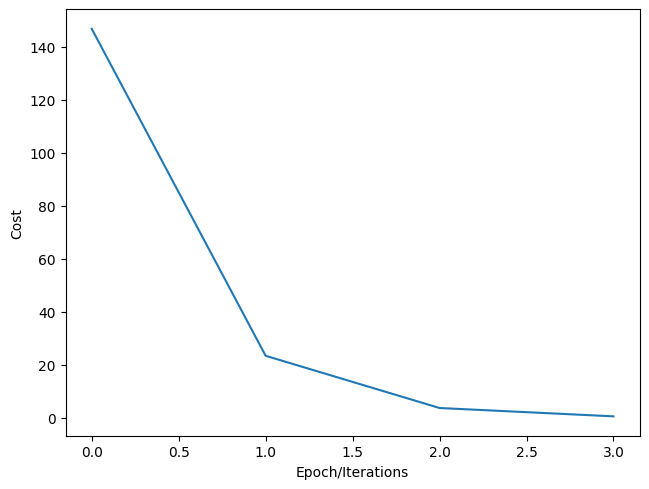

In [98]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<class 'numpy.ndarray'>


<ipython-input-87-aed0fd8494ff>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


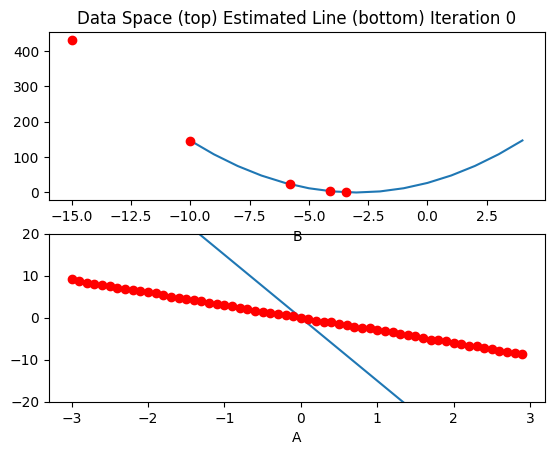

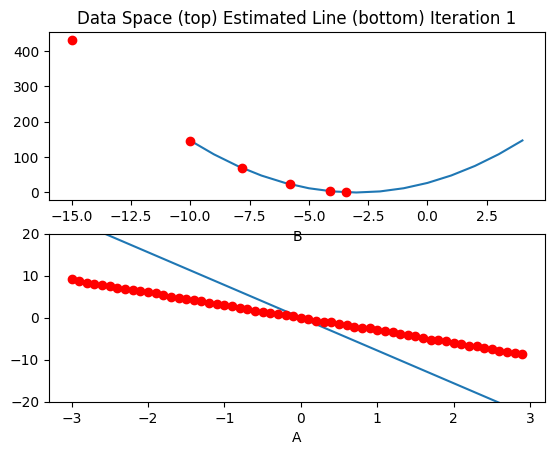

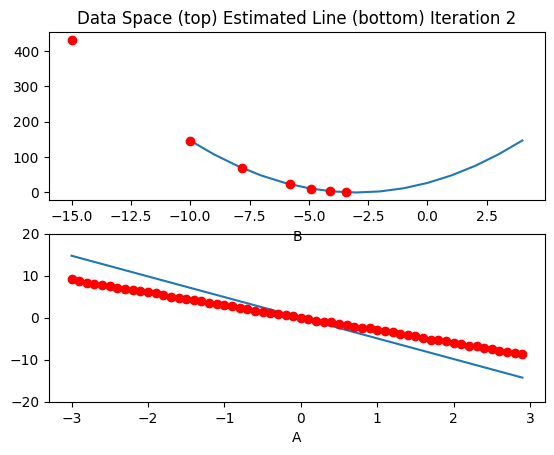

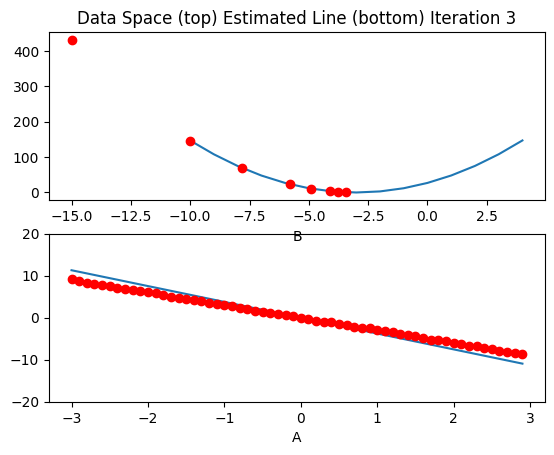

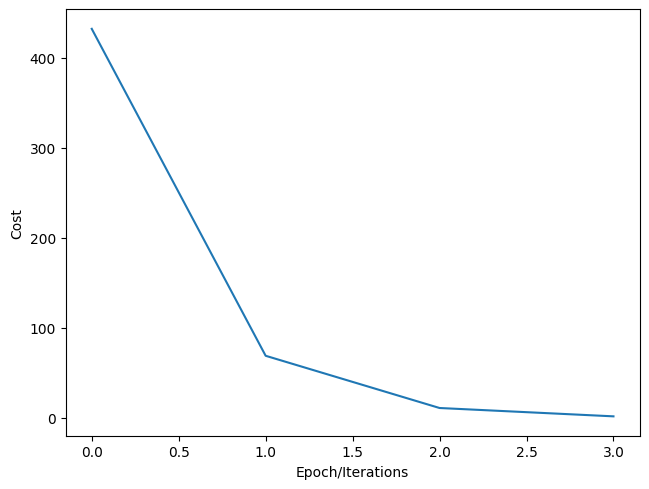

In [99]:
w = torch.tensor(-15.0, requires_grad=True)

lr = 0.1
LOSS2 = []

gradient_plot1 = plot_diagram(X, Y, w, stop = 15)

# Define a function for training the model

def my_train_model(iter):
  for epoch in range (iter):

    Yhat = forward(X) # prediction step using Yhat
    loss = criterion(Yhat, Y) # calculate the iteration
    gradient_plot(Yhat, w, loss.item(), epoch) # plotting the diagram for a better visual
    LOSS2.append(loss.item()) # store the loss in the list
    loss.backward() # backpass phase to compute gradient with respect to the learned parameters
    w.data = w.data - lr * w.grad.data # update parameters
    w.grad.data.zero_() # zero the gradients before the next backward pass

my_train_model(4)

# Plotting the loss for each iteration
plt.plot(LOSS2)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.show()